<a href="https://colab.research.google.com/github/omadokar/Brain-Tumor-Prediction/blob/main/Brain_Tumor_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import cv2
import os
import random
from sklearn.preprocessing import LabelEncoder
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from imutils import paths
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing import image
from sklearn.preprocessing import StandardScaler

In [ ]:
# pip install opencv-python

In [ ]:
input_dir= "/content/drive/My Drive/DS Workshop/DS Workshop/Brain Tumor Prediction"
class_names = os.listdir(input_dir)
class_names

['Yes', 'No']

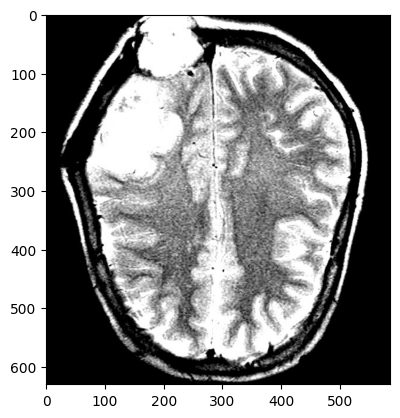

In [ ]:
yes_dir= "/content/drive/My Drive/DS Workshop/DS Workshop/Brain Tumor Prediction/Yes/y1.jpg"
img = cv2.imread(yes_dir)
plt.imshow(img)

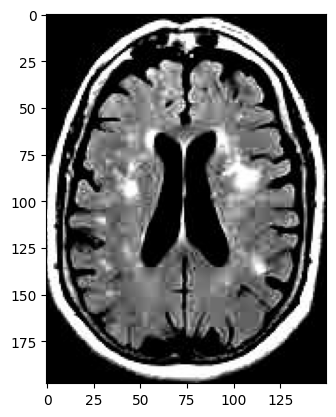

In [ ]:
# no_dir= "/content/drive/My Drive/DS Workshop/DS Workshop/Brain Tumor Prediction/No/no20.jpg"
no_dir= "/content/drive/My Drive/DS Workshop/DS Workshop/Brain Tumor Prediction/No/no1.jpg"

img = cv2.imread(no_dir)
plt.imshow(img)

In [ ]:
yes_path =  "/content/drive/My Drive/DS Workshop/DS Workshop/Brain Tumor Prediction/Yes"
no_path =  "/content/drive/My Drive/DS Workshop/DS Workshop/Brain Tumor Prediction/No"

1/1 [==============================] - 0s 126ms/step


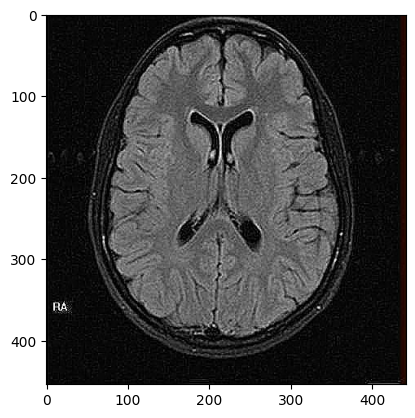

In [ ]:
# Load VGG16 model
pred_dir= "/content/drive/My Drive/DS Workshop/DS Workshop/Brain Tumor Prediction/No/no173.jpg"
img = cv2.imread(pred_dir)
plt.imshow(img)

model = VGG16(weights='imagenet', include_top=False)
img = cv2.imread(pred_dir)
img = cv2.resize(img, (224, 224))
img = np.expand_dims(img, axis=0)
img = preprocess_input(img)
features = model.predict(img)
features = features.reshape(1,-1)

In [ ]:
# List of class names and corresponding labels
class_names = ['No','Yes']
class_labels = {class_name: label for label, class_name in enumerate(class_names)}

In [ ]:
pred=LR_model.predict(features)[0]
print("Prediction is :- ",pred)

Prediction is :-  No


In [ ]:
image_yes=[]
label_yes=[]

for filename in os.listdir(yes_path):
  image_path=os.path.join(yes_path,filename)
  features=extract_features(image_path)
  image_yes.append(features)
  label_yes.append("Yes")

df_yes=pd.DataFrame(image_yes)
df_yes['label']=label_yes

1/1 [==============================] - 0s 19ms/step


In [ ]:
image_no=[]
label_no=[]

for filename in os.listdir(no_path):
  image_path=os.path.join(no_path,filename)
  features=extract_features(image_path)
  image_no.append(features)
  label_no.append("No")

df_no=pd.DataFrame(image_no)
df_no['label']=label_no

1/1 [==============================] - 0s 18ms/step


In [ ]:
df_yes

,0,1,2,3,4,5,6,7,8,9,...,25079,25080,25081,25082,25083,25084,25085,25086,25087,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,26.133537,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Yes
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Yes
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Yes
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Yes
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Yes
196,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Yes
197,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Yes
198,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.523438,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Yes


In [ ]:
df_no

,0,1,2,3,4,5,6,7,8,9,...,25079,25080,25081,25082,25083,25084,25085,25086,25087,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,3.625712,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,No
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,No
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.374682,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,No
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,No
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,No
196,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,No
197,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,2.112330,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,No
198,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,2.618784,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,No


In [ ]:
df_yes.shape

(200, 25089)

In [ ]:
df_no.shape

(200, 25089)

In [ ]:
df=pd.concat([df_yes,df_no])

In [ ]:
df

,0,1,2,3,4,5,6,7,8,9,...,25079,25080,25081,25082,25083,25084,25085,25086,25087,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,26.133537,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,Yes
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,Yes
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,Yes
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,Yes
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,No
196,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,No
197,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,2.112330,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,No
198,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.618784,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,No


In [ ]:
x=df.drop("label",axis=1)
y=df['label']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [ ]:
print("x_train :",x_train.shape)
print("x_test :",x_test.shape)
print("y_train :",y_train.shape)
print("y_test :",y_test.shape)

x_train : (280, 25088)
x_test : (120, 25088)
y_train : (280,)
y_test : (120,)


In [ ]:
from sklearn.linear_model import LogisticRegression
LR_model=LogisticRegression()
print("Model Created")

LR_model.fit(x_train,y_train)
print("Model Created Successfully ")
y_pred=LR_model.predict(x_test)

acc=accuracy_score(y_test,y_pred)

print("Accuracy :",acc*100)
print("Error Rate :",1-acc)

Model Created
Model Created Successfully 
Accuracy : 96.66666666666667
Error Rate : 0.033333333333333326
